# DBSCAN magnitudes plus two colors

I will add the colors: r - H$\alpha$ vs r - i to the sample

In [2]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import pandas as pd
from astropy.table import Table

In [4]:
# Read the data
dim = []
tab = Table.read("../JPLUS_data_6arc.tab", format="ascii.tab")

# The colors
r_ha = tab["rSDSS_MAG_APER_6_0"] - tab["J0660_MAG_APER_6_0"]
r_i = tab["rSDSS_MAG_APER_6_0"] - tab["iSDSS_MAG_APER_6_0"]

# Add the news variables to the table
tab["r_ha"] = r_ha
tab["r_i"] = r_i
for da in tab:
    dim.append(da["uJAVA_MAG_APER_6_0"])
    dim.append(da["J0378_MAG_APER_6_0"])
    dim.append(da["J0395_MAG_APER_6_0"])
    dim.append(da["J0410_MAG_APER_6_0"])
    dim.append(da["J0430_MAG_APER_6_0"])
    dim.append(da["gSDSS_MAG_APER_6_0"])
    dim.append(da["J0515_MAG_APER_6_0"])
    dim.append(da["rSDSS_MAG_APER_6_0"])
    dim.append(da["J0660_MAG_APER_6_0"])
    dim.append(da["iSDSS_MAG_APER_6_0"])
    dim.append(da["J0861_MAG_APER_6_0"])
    dim.append(da["zSDSS_MAG_APER_6_0"])
    dim.append(da["r_ha"])
    dim.append(da["r_i"])

In [8]:
shape = (len(tab["Number"]), 14)
dim_matrix = np.array(dim).reshape(shape)
dim_matrix.shape


(259461, 14)

In [9]:
dim_matrix

array([[16.8  , 16.742, 16.276, ..., 13.368,  0.11 ,  0.223],
       [17.37 , 17.351, 16.836, ..., 13.902,  0.099,  0.244],
       [17.729, 17.648, 17.379, ..., 14.514,  0.12 ,  0.277],
       ...,
       [19.008, 18.725, 18.75 , ..., 17.103,  0.046,  0.199],
       [17.947, 17.204, 16.722, ..., 17.095, -0.15 , -0.175],
       [18.638, 18.714, 18.368, ..., 16.4  ,  0.091,  0.215]])

In [10]:
# Standarized the data
dim_matrix = StandardScaler().fit_transform(dim_matrix)
dim_matrix

array([[-1.09777987, -0.96233449, -1.2278561 , ..., -1.90857681,
         0.76739397,  0.2584623 ],
       [-0.63770197, -0.480241  , -0.78166047, ..., -1.50216201,
         0.58244362,  0.4360618 ],
       [-0.34793361, -0.24513136, -0.34901005, ..., -1.03638325,
         0.93553066,  0.71514672],
       ...,
       [ 0.68441663,  0.60743792,  0.74337248, ...,  0.93404355,
        -0.30868081,  0.05549144],
       [-0.17197399, -0.59660839, -0.87249315, ...,  0.92795494,
        -3.60415984, -3.10747107],
       [ 0.38576957,  0.59873016,  0.43900332, ...,  0.39900684,
         0.44793427,  0.19080534]])

Estimate the epsilom value

In [58]:
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=28)
nbrs = neigh.fit(dim_matrix)
distances, indices = nbrs.kneighbors(dim_matrix)

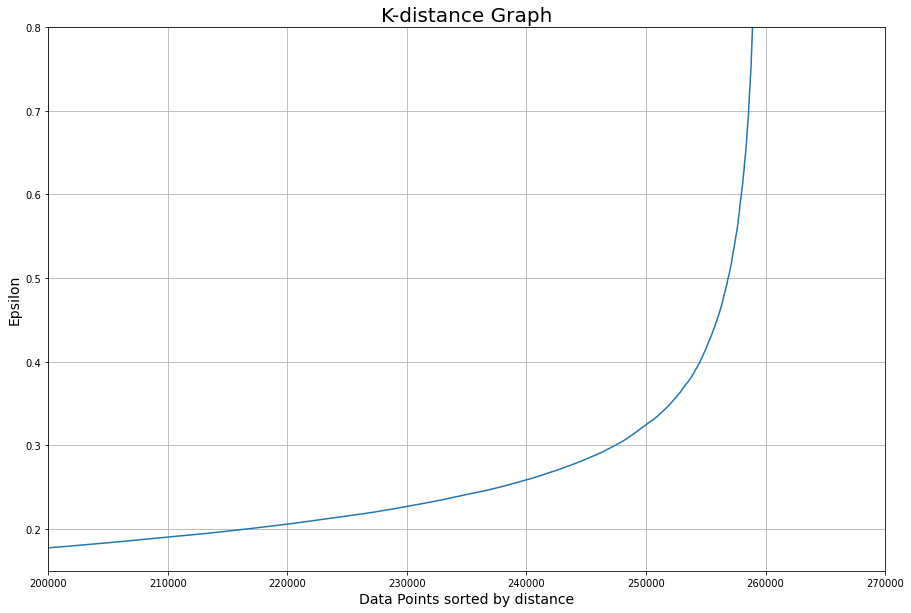

In [59]:
# Plotting
import matplotlib.pyplot as plt
%matplotlib inline

# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(15,10))
plt.plot(distances)
plt.xlim(2e5,2.7e5)
plt.ylim(0.15,0.8)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.grid()
plt.show()

In [60]:
# Compute DBSCAN for the eps=0.40, 2° model
db = DBSCAN(eps=0.4, min_samples=50).fit(dim_matrix)
labels = db.labels_

In [40]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_cluster = list(labels).count(0)
n_noise_ = list(labels).count(-1)

# Print parameters with the second model
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of cluster points: %d' % n_cluster)
print('Estimated number of noise points: %d' % n_noise_)

# Add labels
tab['DBSCAN_opt_labels'] = labels

Estimated number of clusters: 9
Estimated number of cluster points: 242580
Estimated number of noise points: 16579


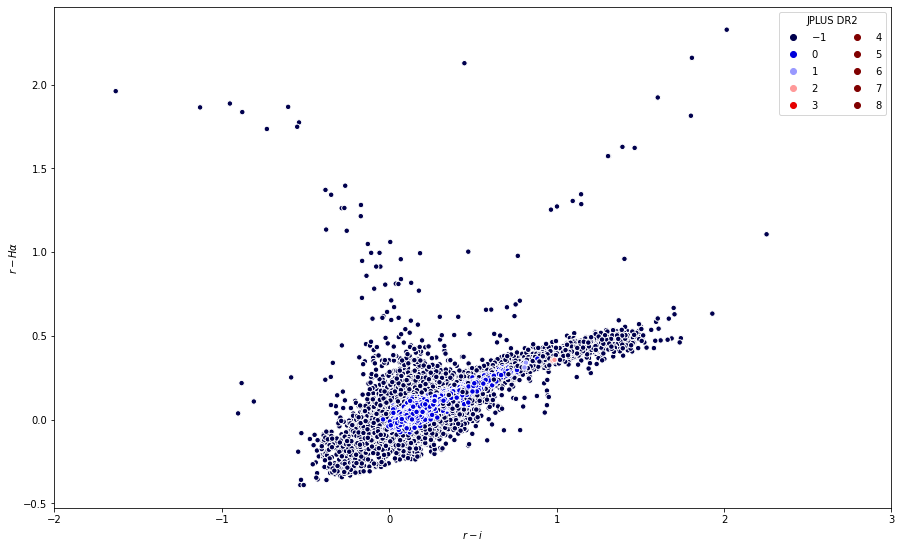

In [47]:
fig, ax = plt.subplots(figsize=(15, 15))
scatter = ax.scatter(
    r_i,
    r_ha,
    s=30,
    c=tab['DBSCAN_opt_labels'],
    edgecolors="w",
    linewidths=1,
    vmin=-1,
    vmax=4,
    cmap="seismic",
)
ax.set(
    xlim=[-2.0, 3.0],
    #ylim=[ymin, ymax],
    xlabel=r"$r - i$",
    ylabel=r"$r - H\alpha$",
)
ax.legend(*scatter.legend_elements(), ncol=2, title="JPLUS DR2")
ax.set_aspect("equal")

In [49]:
# Compute DBSCAN for the eps=0.35, 
db1 = DBSCAN(eps=0.35, min_samples=28).fit(dim_matrix)
labels1 = db1.labels_

In [51]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_1 = len(set(labels1)) - (1 if -1 in labels1 else 0)
n_cluster1 = list(labels1).count(0)
n_noise_1 = list(labels1).count(-1)

# Print parameters with the second model
print('Estimated number of clusters: %d' % n_clusters_1)
print('Estimated number of cluster points: %d' % n_cluster1)
print('Estimated number of noise points: %d' % n_noise_1)

# Add labels
tab['DBSCAN_opt_labels1'] = labels1

Estimated number of clusters: 8
Estimated number of cluster points: 234951
Estimated number of noise points: 24197


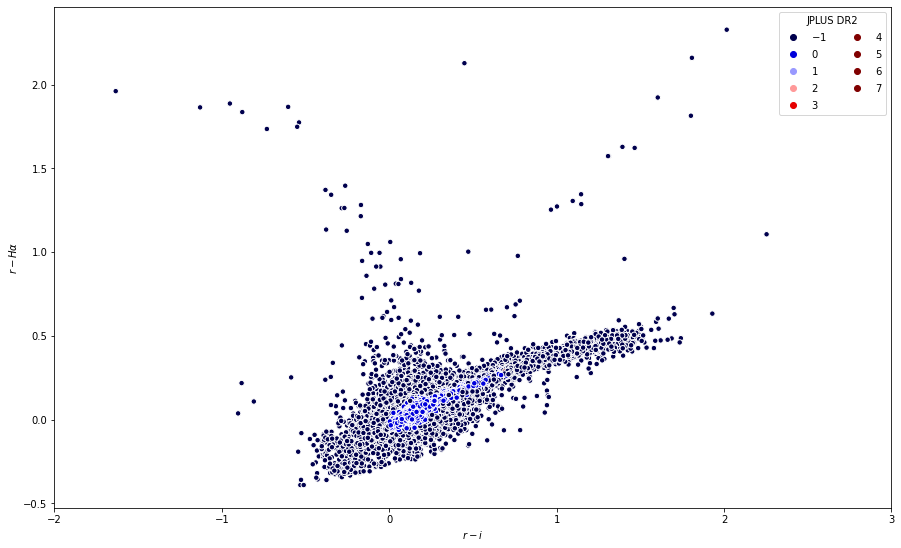

In [53]:
fig, ax1 = plt.subplots(figsize=(15, 15))
scatter = ax1.scatter(
    r_i,
    r_ha,
    s=30,
    c=tab['DBSCAN_opt_labels1'],
    edgecolors="w",
    linewidths=1,
    vmin=-1,
    vmax=4,
    cmap="seismic",
)
ax1.set(
    xlim=[-2.0, 3.0],
    #ylim=[ymin, ymax],
    xlabel=r"$r - i$",
    ylabel=r"$r - H\alpha$",
)
ax1.legend(*scatter.legend_elements(), ncol=2, title="JPLUS DR2")
ax1.set_aspect("equal")

In [55]:
# Compute DBSCAN for the eps=0.45, 
db2 = DBSCAN(eps=0.45, min_samples=28).fit(dim_matrix)
labels2 = db2.labels_

In [56]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_2 = len(set(labels2)) - (1 if -1 in labels2 else 0)
n_cluster2 = list(labels2).count(0)
n_noise_2 = list(labels2).count(-1)

# Print parameters with the second model
print('Estimated number of clusters: %d' % n_clusters_2)
print('Estimated number of cluster points: %d' % n_cluster2)
print('Estimated number of noise points: %d' % n_noise_2)

# Add labels
tab['DBSCAN_opt_labels2'] = labels2

Estimated number of clusters: 4
Estimated number of cluster points: 248278
Estimated number of noise points: 11132


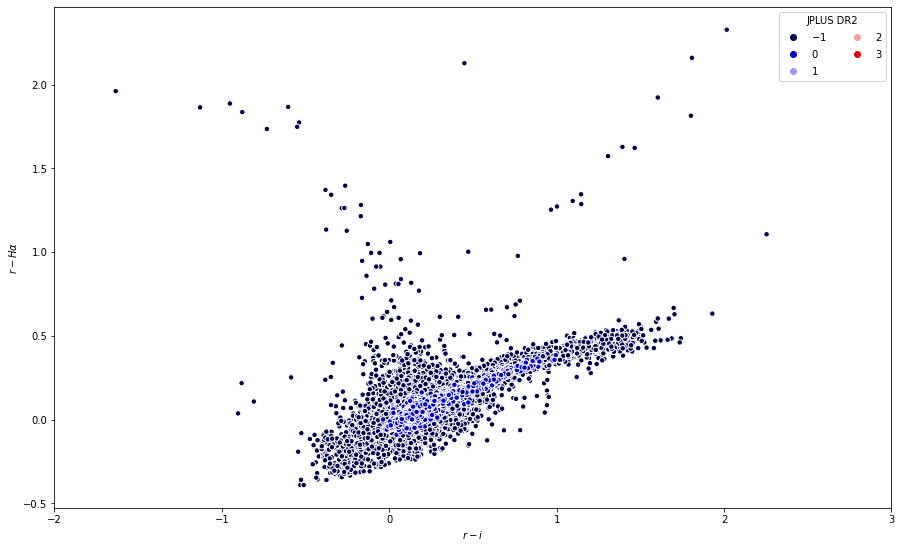

In [57]:
fig, ax2 = plt.subplots(figsize=(15, 15))
scatter = ax2.scatter(
    r_i,
    r_ha,
    s=30,
    c=tab['DBSCAN_opt_labels2'],
    edgecolors="w",
    linewidths=1,
    vmin=-1,
    vmax=4,
    cmap="seismic",
)
ax2.set(
    xlim=[-2.0, 3.0],
    #ylim=[ymin, ymax],
    xlabel=r"$r - i$",
    ylabel=r"$r - H\alpha$",
)
ax2.legend(*scatter.legend_elements(), ncol=2, title="JPLUS DR2")
ax2.set_aspect("equal")